#### Predicting the category(query/request/complain) using Machine Learning

#### Problem Definition
In this, we will building a machine learning model which is capable of predicting the category based on user's message

In [193]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn model
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [194]:
data = pd.read_csv("dataset.csv")

data.tail()

,Query,Category
90,"Rainy water is flooded in houses in my area, s...",4
91,Houses in our street is flooded with water due...,4
92,Rain water is passing through the houses in my...,4
93,"There is heavy storm and thunder , please stop...",4
94,Stop the power supply in order to avoid damage...,4


In [195]:
data.isna().sum()

Query       0
Category    0
dtype: int64

In [196]:
data["Category"].unique()

array([1, 2, 3, 4], dtype=int64)

In [197]:
X = data["Query"]
y = data["Category"]

In [198]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [199]:
X_train.shape, X_test.shape

((76,), (19,))

In [200]:
vect = CountVectorizer(ngram_range=(2,2))

X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [201]:
mnb = MultinomialNB(alpha =0.2)

mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)
print(y_pred)

[4 1 4 4 1 1 2 2 1 1 4 3 4 2 1 1 1 1 2]


In [202]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.95        19
   macro avg       0.97      0.95      0.96        19
weighted avg       0.95      0.95      0.95        19



In [204]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [1, 4, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 5]], dtype=int64)

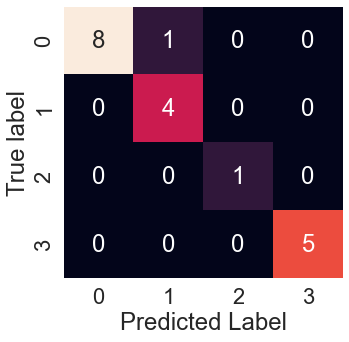

In [205]:
sns.set(font_scale=2);

fig, ax = plt.subplots(figsize=(5, 5));
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cbar=False);

plt.xlabel("Predicted Label");
plt.ylabel("True label");

In [206]:
import joblib

joblib.dump(mnb, "model");
joblib.dump(vect, "vectorizer");

In [207]:
loaded_model = joblib.load("model")
loaded_vect = joblib.load("vectorizer")

In [208]:
l = ['There is transformer burst near my house']
df = pd.DataFrame(l, columns=["Query"])
print(df["Query"])

df = loaded_vect.transform(df["Query"])
# print(df)
pred = loaded_model.predict(df)

print(pred)

0    There is transformer burst near my house
Name: Query, dtype: object
[3]
